<a href="https://colab.research.google.com/github/aahanatiwari/titanic-minorproject/blob/main/Aahana_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

In [8]:
!ls

sample_data  titanic-minorproject


In [12]:
train = pd.read_csv('/train.csv')

In [13]:
test = pd.read_csv('/test.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Are there any inconsistent or incorrect data entries that need to be corrected or standardized?

In [16]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2> There are 177 Age values, 687 Cabin values and 2 Embarked values, that need to be standardized.

Pre-Processing Step

Since Age is a numeric value, we replace missing values with average of all Age values.

In [25]:
avg = train['Age'].mean()

In [27]:
train['Age'] = train['Age'].fillna(avg)

In [29]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column contains string values, so we fill missing values as 'Unknown'.

In [31]:
train['Cabin'] = train['Cabin'].fillna('Unknown')

Since only 2 values are missing from Embarked column, we replace them with the most frquent one.

In [32]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
train['Embarked'] = train['Embarked'].fillna('S')

In [34]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Factors like Name, PassengerId and Ticket Number are not relevant factors to determine the likeliness of survival.

In [ ]:
train = train.drop('Name','PassengerId','Ticket')

# How can we visualize the survival rate of passengers based on different variables such as age, gender, and socio-economic class?

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

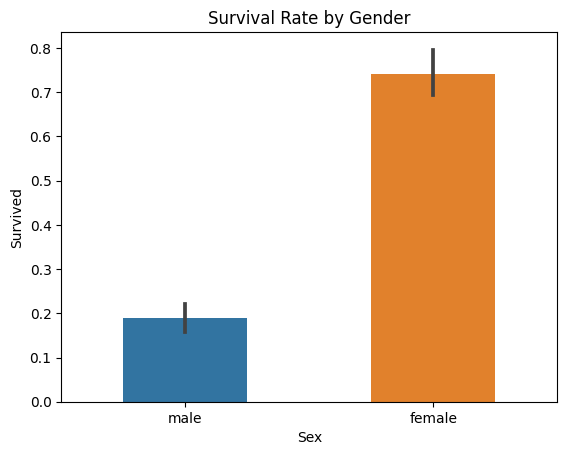

In [48]:
sns.barplot(x=train['Sex'], y=train['Survived'], width = 0.5)
plt.title('Survival Rate by Gender')
plt.show()

# Can we create visualizations to understand the relationship between different passenger characteristics (e.g., age, class) and survival?

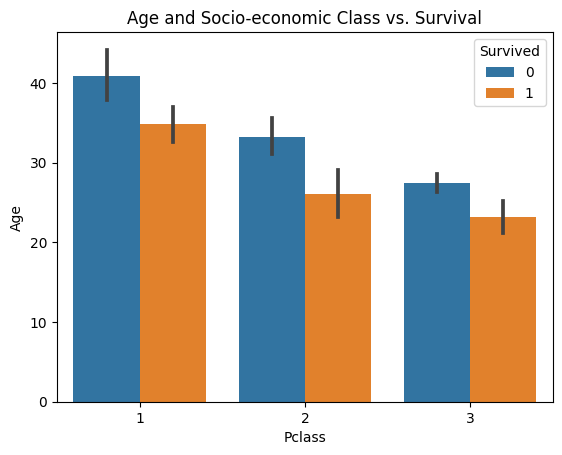

In [42]:
sns.barplot(x='Pclass', y='Age', hue='Survived', data=train)
plt.title('Age and Socio-economic Class vs. Survival')
plt.show()

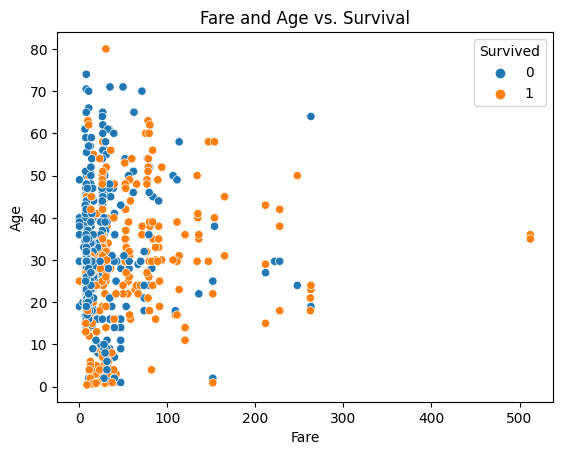

In [43]:
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=train)
plt.title('Fare and Age vs. Survival')
plt.show()

# How can we visualize the distribution of different variables (e.g., age, fare) to identify any patterns or outliers?

# Can we visualize the distribution of survivors and non-survivors based on different variables to gain insights into the factors that influenced survival?